## Spam Message Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('spam.tsv', sep='\t')

In [3]:
# Check for missing values
data.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
# data.groupby(['label']).count() 
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
ham = data[data['label'] == 'ham']
spam = data[data['label'] == 'spam']
ham = ham.sample(spam.shape[0])
new_df = ham.append(spam, ignore_index=True)

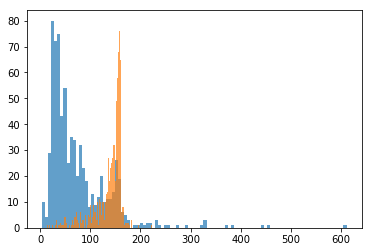

In [7]:
# Checking the distrubution of email categories over length

plt.hist(new_df[new_df['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(new_df[new_df['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

# This plot highlights the possible correlation between the length of an email and the email category

### Training and testing

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df['message'], new_df['label'], test_size = 0.3, random_state = 0, shuffle=True)



Random Forest Algorithm

In [13]:
# Applying the Random Forest Algorithm

# First we need to encode categorical variables

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier(n_estimators=100))])
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Testing the accuracy of the model
model_accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test,y_pred)

# print(class_report)


SVM Model

In [20]:
from sklearn.svm import SVC

svm = Pipeline([("tfidf", TfidfVectorizer()),("classifier", SVC(C=100, gamma='auto'))])

svm.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [25]:
svm_pred = svm.predict(X_test)

model_accuracy = accuracy_score(y_test, svm_pred)
class_report = classification_report(y_test,svm_pred)

print(model_accuracy ,'\n', class_report )

0.9487750556792873 
               precision    recall  f1-score   support

         ham       0.93      0.98      0.95       227
        spam       0.98      0.92      0.95       222

   micro avg       0.95      0.95      0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449

